In [48]:
#Itzel Rubí Alcalá Gil clasificación de base de datos de pacientes con Parkinson

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
df = pd.read_csv('/content/drive/MyDrive/Fotos/parkinsons_disease_data.csv')


In [52]:
print(df.dtypes)
print(df.info())

PatientID                     int64
Age                           int64
Gender                        int64
Ethnicity                     int64
EducationLevel                int64
BMI                         float64
Smoking                       int64
AlcoholConsumption          float64
PhysicalActivity            float64
DietQuality                 float64
SleepQuality                float64
FamilyHistoryParkinsons       int64
TraumaticBrainInjury          int64
Hypertension                  int64
Diabetes                      int64
Depression                    int64
Stroke                        int64
SystolicBP                    int64
DiastolicBP                   int64
CholesterolTotal            float64
CholesterolLDL              float64
CholesterolHDL              float64
CholesterolTriglycerides    float64
UPDRS                       float64
MoCA                        float64
FunctionalAssessment        float64
Tremor                        int64
Rigidity                    

In [53]:
df=df.drop('DoctorInCharge',axis=1)
df=df.drop('PatientID',axis=1)

In [54]:
df.describe()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,...,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,69.601900,0.492637,0.692637,1.337292,27.209493,0.296437,10.040413,5.016674,4.912901,6.996639,...,15.094314,4.989694,0.431829,0.252732,0.207601,0.138717,0.295012,0.245131,0.296912,0.619477
std,11.594511,0.500065,1.003827,0.895840,7.208099,0.456795,5.687014,2.890919,2.872115,1.753065,...,8.643014,2.933877,0.495449,0.434682,0.405686,0.345733,0.456156,0.430267,0.457006,0.485631
min,50.000000,0.000000,0.000000,0.000000,15.008333,0.000000,0.002228,0.004157,0.000011,4.000497,...,0.021191,0.001505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,0.000000,0.000000,1.000000,20.782176,0.000000,5.150278,2.455703,2.478503,5.488864,...,7.517160,2.415890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,70.000000,0.000000,0.000000,1.000000,27.184571,0.000000,10.070337,5.031550,4.825187,6.929819,...,14.963574,4.983227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,80.000000,1.000000,1.000000,2.000000,33.462452,1.000000,14.829565,7.512795,7.381487,8.558719,...,22.608362,7.484220,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,89.000000,1.000000,3.000000,3.000000,39.999887,1.000000,19.988866,9.995255,9.995864,9.999821,...,29.970107,9.992697,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# Preparación de datos
#X = df[['Age', 'Gender','Ethnicity','EducationLevel','BMI','Smoking','AlcoholConsumption','PhysicalActivity','DietQuality','SleepQuality','FamilyHistoryParkinsons','TraumaticBrainInjury','Hypertension','Diabetes','Depression','Stroke','SystolicBP','DiastolicBP','CholesterolTotal','CholesterolLDL','CholesterolHDL','CholesterolTriglycerides','UPDRS','MoCA','FunctionalAssessment','Tremor','Rigidity','Bradykinesia','PosturalInstability','SpeechProblems','SleepDisorders','Constipation']]
#y = df['Diagnosis']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

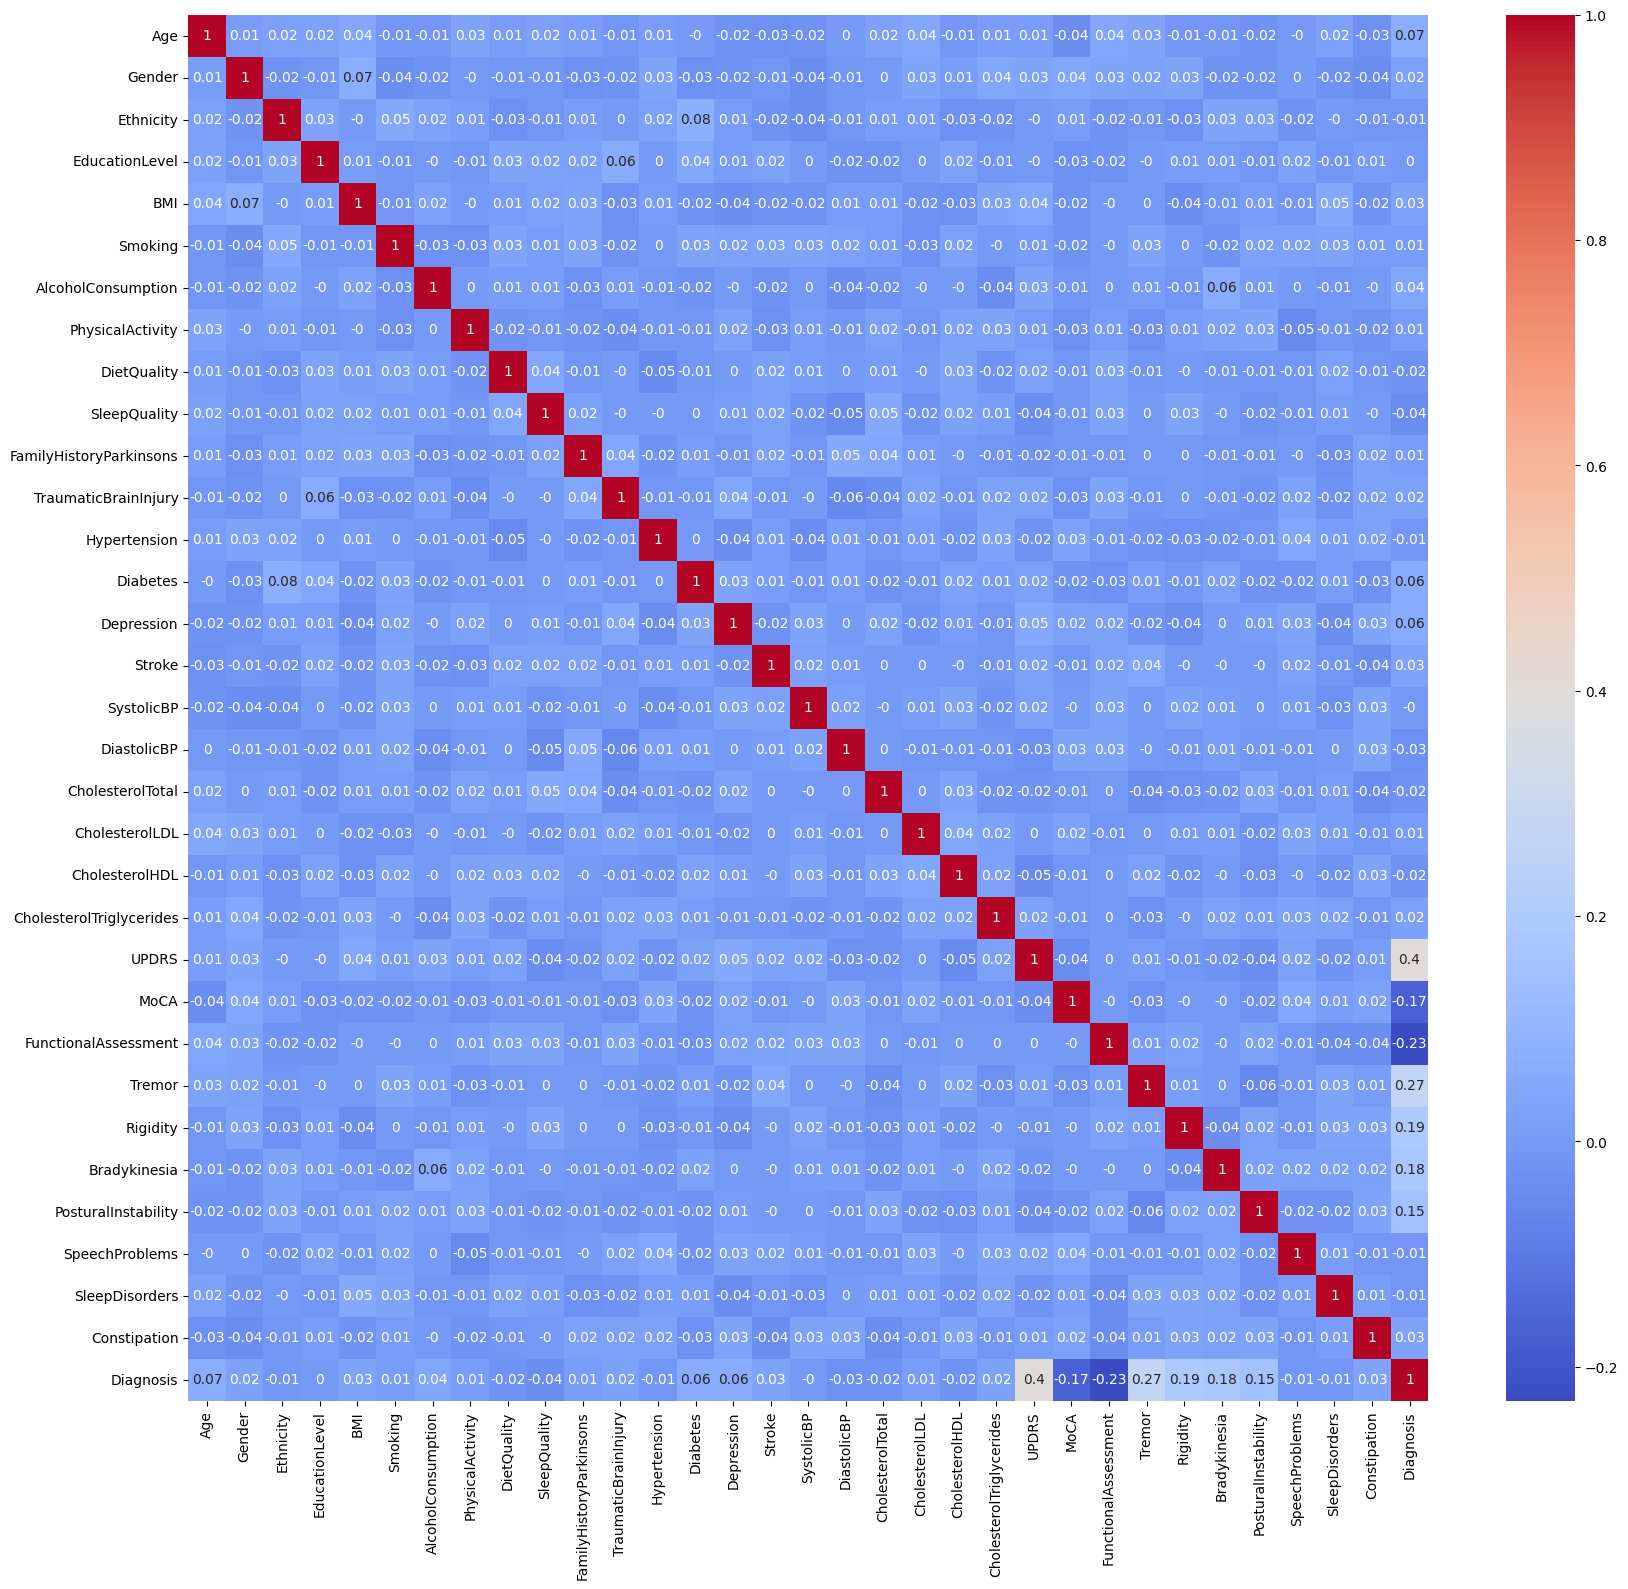

In [55]:
# Matriz de correlación
plt.figure(figsize=(20, 18))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [56]:
#Creando un nuevo daata frame con las variables que tengan una correlación mayor a 15% con el diagnóstico
nuevo_df=df[['UPDRS','MoCA','FunctionalAssessment','Tremor','Rigidity','Bradykinesia','PosturalInstability','Diagnosis']]
print(nuevo_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   UPDRS                 2105 non-null   float64
 1   MoCA                  2105 non-null   float64
 2   FunctionalAssessment  2105 non-null   float64
 3   Tremor                2105 non-null   int64  
 4   Rigidity              2105 non-null   int64  
 5   Bradykinesia          2105 non-null   int64  
 6   PosturalInstability   2105 non-null   int64  
 7   Diagnosis             2105 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 131.7 KB
None


In [57]:
X = nuevo_df[['UPDRS','MoCA','FunctionalAssessment','Tremor','Rigidity','Bradykinesia','PosturalInstability']]
y = nuevo_df['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Modelo Árbol de Decisión
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

Accuracy: 0.8907363420427553


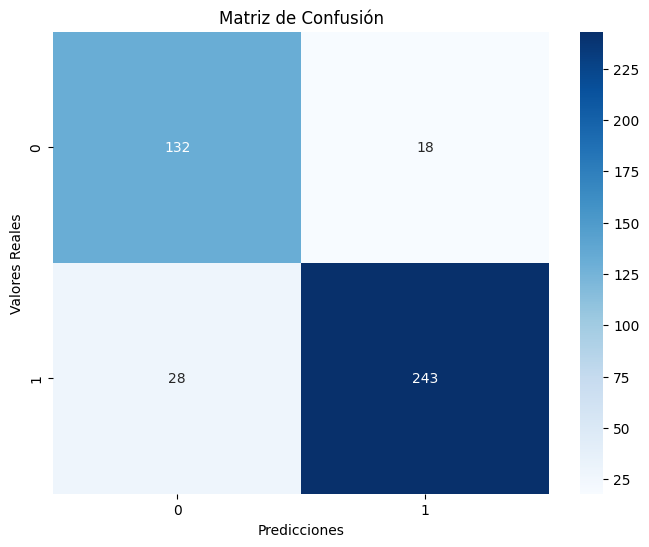

In [59]:
# Predicciones y matriz de confusión
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()


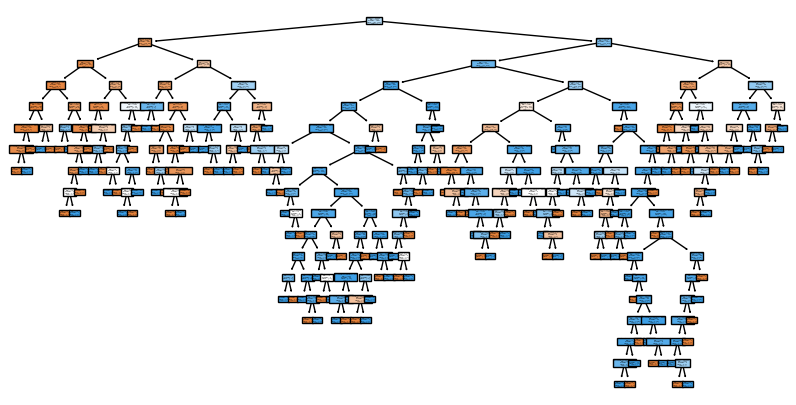

In [60]:
# Visualización del árbol
plt.figure(figsize=(10,5))
plot_tree(model, feature_names=['UPDRS','MoCA','FunctionalAssessment','Tremor','Rigidity','Bradykinesia','PosturalInstability'], class_names=['0', '1'], filled=True)
plt.show()

In [61]:
from sklearn.svm import SVC

In [62]:
# Entrenar el modelo SVM
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [63]:
# Predicciones
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7933491686460807


Accuracy: 0.7933491686460807


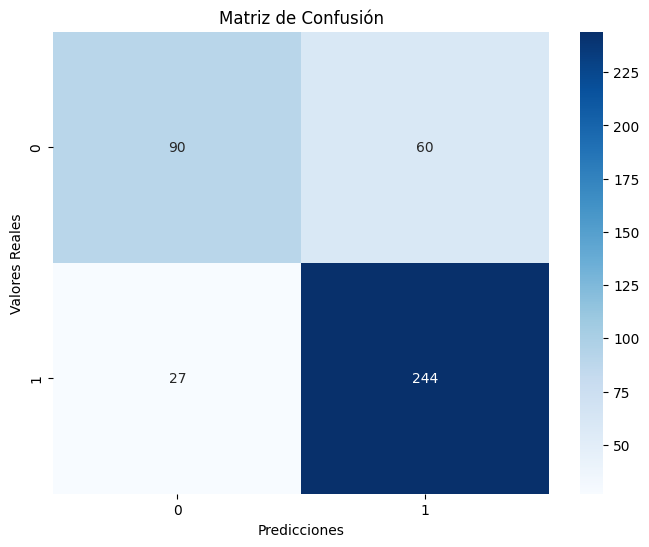

In [64]:
# Predicciones y matriz de confusión
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()


In [65]:
# modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Precisión en entrenamiento: 0.8242280285035629
Precisión en prueba: 0.7838479809976246
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.70      0.69      0.69       150
           1       0.83      0.84      0.83       271

    accuracy                           0.78       421
   macro avg       0.76      0.76      0.76       421
weighted avg       0.78      0.78      0.78       421



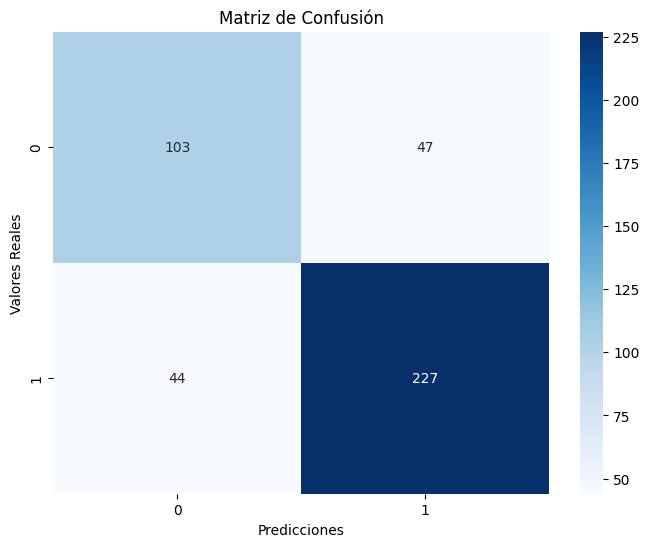

In [66]:
# Predicciones
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Métricas de evaluación
print(f"Precisión en entrenamiento: {accuracy_score(y_train, y_train_pred)}")
print(f"Precisión en prueba: {accuracy_score(y_test, y_test_pred)}")
print("Informe de clasificación:")
print(classification_report(y_test, y_test_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

In [67]:
#hasta ahota el test que mejor acurracy me arrojó fue el de árboles de decisión con un 89.07%

In [77]:
pip install lazypredict

In [78]:

from lazypredict.Supervised import LazyClassifier

In [79]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:07<00:00,  3.88it/s]

[LightGBM] [Info] Number of positive: 1033, number of negative: 651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000524 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 777
[LightGBM] [Info] Number of data points in the train set: 1684, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.613420 -> initscore=0.461713
[LightGBM] [Info] Start training from score 0.461713
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.93               0.93     0.93      0.93   
AdaBoostClassifier                 0.93               0.92     0.92      0.93   
ExtraTreesClassifier               0.91               0.91     0.91      0.91   
LGBMClassifier                     0.91      

In [ ]:
#Voy a seguir las recomendaciones de lazy predict y hacer un modelo con Random forest

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
# Crear una instancia del modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.9287410926365796
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       150
           1       0.95      0.94      0.94       271

    accuracy                           0.93       421
   macro avg       0.92      0.93      0.92       421
weighted avg       0.93      0.93      0.93       421



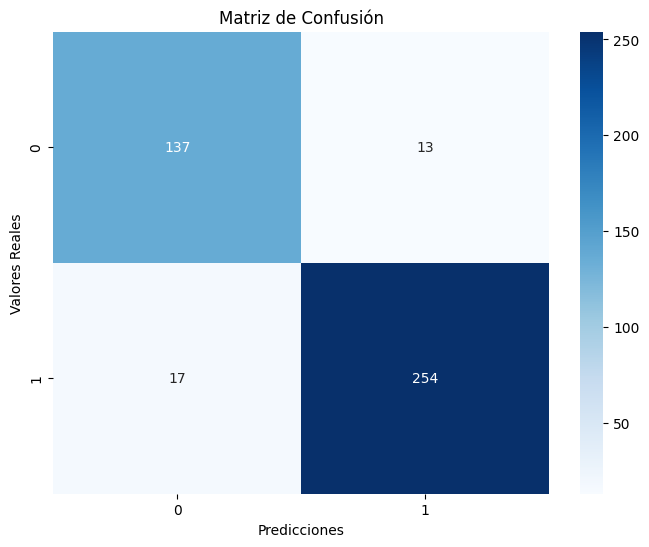

In [87]:
# Hacer predicciones con el modelo entrenado
y_pred = rf.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Reporte de clasificación
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()


In [ ]:
#Puedo concluír que el modelo clasificador que mejor acurracy me arrojó fue el de random forest con un 93%